<a href="https://colab.research.google.com/github/marcelodepaoli/13_Regressao_Logistica/blob/main/01_Regress%C3%A3o_Log%C3%ADstica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Logística com Python

Iremos trabalhar com o [Titanic Data Set](https://www.kaggle.com/c/titanic) obtido do Kaggle. Este é um conjunto de dados muito famoso e muitas vezes é o primeiro passo de um aluno em machine learning!

Tentaremos prever uma classificação: sobrevivência ou falecimento.
Vamos começar a compreensão da implementação da regressão logística em Python para classificação.

Usaremos uma versão "semi-limpa" do conjunto de dados do Titanic, se você usar o conjunto de dados hospedado diretamente no Kaggle, talvez seja necessário fazer algumas limpezas adicionais.

##Importar Bibliotecas

Vamos importar algumas bibliotecas para começar!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Os Dados


Vamos começar lendo o arquivo titanic_train.csv em um pandas dataframe.

In [2]:
# Esse trecho do código é obrigatório para quem estiver fazendo tudo pelo colab
# Caso você esteja utilizando o jupyter pode comentar/apagar
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/13_Regressão_Logística")
os.listdir()

Mounted at /content/drive


['titanic_train.csv',
 'advertising.csv',
 'titanic_test.csv',
 '02 - Projeto de Regressão Logística.ipynb',
 '03 - Projeto de Regressão Logística - SOLUÇÕES.ipynb',
 'Cópia de 01 - Regressão Logística com Python.ipynb',
 '01 - Regressão Logística com Python.ipynb']

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Exploratory Data Analysis

Vamos começar uma análise exploratória de dados! Começaremos verificando os dados ausentes!

##Missing Data

Podemos usar o seaborn para criar um mapa de calor simples para ver onde estão faltando dados!

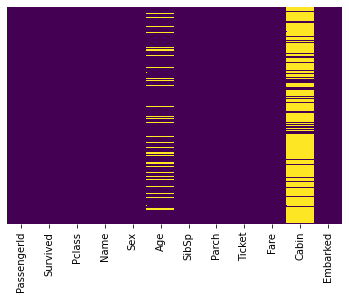

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Cerca de 20 por cento dos dados de idade estão ausentes. A proporção de Idade ausente é, provavelmente, pequena o suficiente para que uma substituição com alguma forma de inputação fique razoável. Olhando para a coluna Cabine, no entanto, parece que um número excessivo destes dados estão faltando para se obter alguma informação útil com uma análise básica. Provavelmente vamos abandonar essa coluna ou alterá-la para uma outra característica como "Cabin Known: 1 ou 0"

Vamos continuar visualizando mais alguns dados!

##Data Cleaning

Queremos preencher os dados de idade ausentes em vez de apenas descartar as linhas de dados de idade ausentes. Uma forma de fazer isso é preenchendo com a idade média de todos os passageiros (imputação).

No entanto, podemos ser mais espertos quanto a isso e verificar a idade média por classe de passageiros. Por exemplo:


Podemos ver que os passageiros nas classes mais altas (mais ricos) tendem a ser mais velhos. Usaremos esses valores de idade média para imputar com base em Pclass por Age.

Aplicando essa função!

Verificando o mapa de calor novamente!

Excelente! Vamos em frente e remover a coluna Cabin e a linha em Embarked que é NaN.

##Convertendo Características Categóricas 

Precisaremos converter características categóricass em variáveis ​​fictícias usando pandas! Caso contrário, nosso algoritmo de aprendizado de máquina não poderá receber diretamente essas características como entradas.

Excelente! Nossos dados estão prontos para o nosso modelo!

#Construindo um Modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e um conjunto de teste (há outro arquivo test.csv com o qual você pode brincar caso queira usar todos esses dados para treinamento).

##Train Test Split

##Treinamento e Prevendo

Vamos avaliar o modelo!

##Avaliação

Podemos verificar precision, recall, f1-score utilizando classification_report!

Não ficou tão ruim! Você pode explorar outras características e o outro arquivo titanic_test.csv, algumas sugestões:

* Tente utilizar o título (Dr., Mr., Mrs, etc.) do nome como uma característica
* Talvez a letra Cabin possa ser uma característica
* Existe alguma informação que você pode obter do bilhete (ticket)?